In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind_from_stats, f_oneway, chi2_contingency, chi2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<AxesSubplot: xlabel='registered', ylabel='Count'>

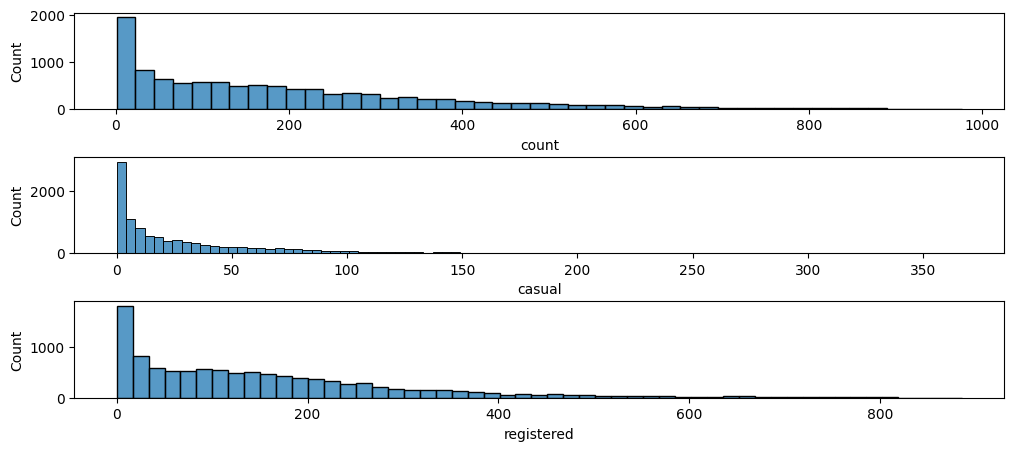

In [11]:
#visual analysis of the counts

fig, ax=plt.subplots(3,1, figsize=(12,5))
plt.subplots_adjust(hspace=0.5)
sns.histplot(ax=ax[0], data=df, x='count')
sns.histplot(ax=ax[1], data=df, x='casual')
sns.histplot(ax=ax[2], data=df, x='registered')

In [3]:
#check the individual stats and distributions of the continuous variables

# df.isna().sum()
# df[df['count']<25]
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot: xlabel='humidity', ylabel='Count'>

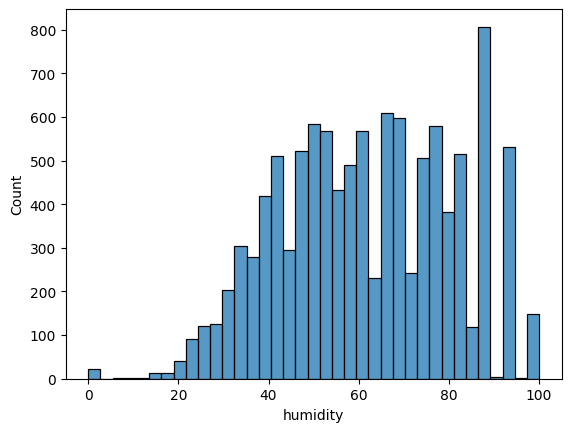

In [34]:
# df['season'].value_counts()
# df['holiday'].value_counts()
# df['workingday'].value_counts()
# df['weather'].value_counts()
sns.histplot(df['humidity'])

C:\Users\prach\AppData\Local\Temp\ipykernel_20220\757096120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fo['log_count']=np.log(df_fo['count'])


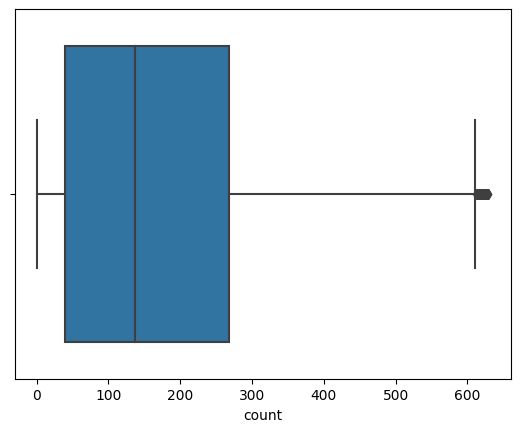

In [12]:
#outlier check and filtering of outliers for a better generalization of the distribution

bp=sns.boxplot(x=df[df['count']<630]['count'])
df_fo=df[(df['count']<630)&(df['count']>25)]

#log transformation of the count to make the distribution more normal

df_fo['log_count']=np.log(df_fo['count'])

C:\Users\prach\AppData\Local\Temp\ipykernel_20220\2581843672.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True)


<AxesSubplot: >

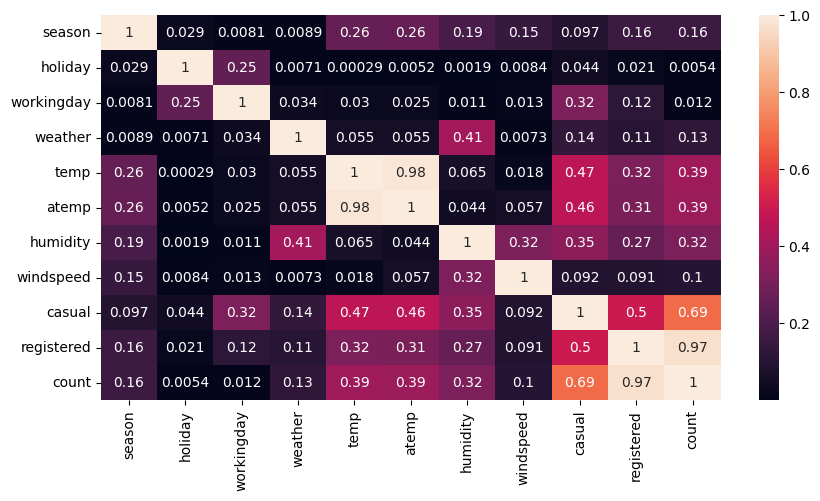

In [17]:
#check bivariate relations using heatmap

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr().abs(), annot=True)
# sns.heatmap(df.corr(), annot=True)
#sns.heatmap(df_fo.corr(), annot=True)

<AxesSubplot: xlabel='windspeed', ylabel='Count'>

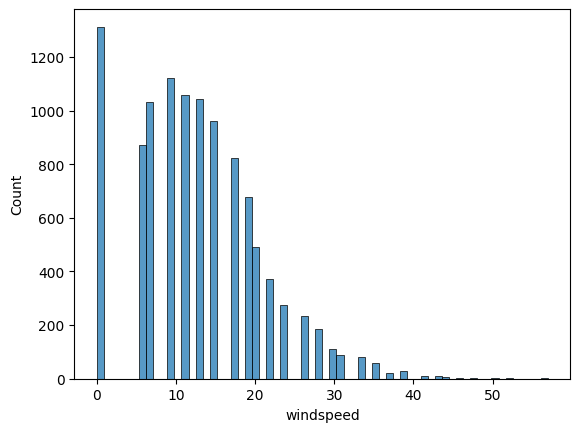

In [28]:
# sns.boxplot(df['count'])
# df[df['count']>630]
sns.histplot(df['windspeed'])

In [73]:
#division of the two groups for the hypothesis test on effect of working day on total count

work=df_fo[df_fo['workingday']==1]
not_work=df_fo[df_fo['workingday']==0]
print(work['log_count'].describe(), '\t', not_work['log_count'].describe())

count    5641.000000
mean        5.115778
std         0.760631
min         3.258097
25%         4.653960
50%         5.220356
75%         5.673323
max         6.444131
Name: log_count, dtype: float64 	 count    2810.000000
mean        5.053622
std         0.853385
min         3.258097
25%         4.382027
50%         5.153292
75%         5.804381
max         6.442540
Name: log_count, dtype: float64


In [79]:
#2 sample t test for checking effect of working day on count

ttest_ind_from_stats(5.11, 0.76, 5641, 5.05, 0.85, 2810, equal_var=False, alternative='greater')

Ttest_indResult(statistic=3.1644291907431357, pvalue=0.0007815153703424455)

In [81]:
#division of groups for the 4 seasons to check their effect on the count of users

# df_fo['season']
# pd.crosstab(df_fo['season'], df_fo['weather'])
count_dict={}
stats={}
for value in df_fo['season'].unique():
    count_dict[value]=df_fo[df_fo['season']==value][['count','log_count']]
    # print(f'value: {value}\n f{count_dict[value].describe()}\n')
    stats[value]=count_dict[value].describe()


In [92]:
#anova test for effect of seasons on the user count

# sns.histplot(count_dict[3]['log_count'])
# count_dict[1]['log_count']
f_oneway(count_dict[1]['log_count'], count_dict[2]['log_count'], count_dict[3]['log_count'], count_dict[4]['log_count'])

F_onewayResult(statistic=196.31564877384338, pvalue=4.428896619679389e-123)

In [97]:
#division of groups for the 4 weathers to check their effect on the count of users

weather_count_dict={}
weather_stats={}
for value in df_fo['weather'].unique():
    weather_count_dict[value]=df_fo[df_fo['weather']==value][['count','log_count']]
    # print(f'value: {value}\n f{count_dict[value].describe()}\n')
    weather_stats[value]=count_dict[value].describe()

In [102]:
#anova test for effect of weathers on the user count

# sns.histplot(season_count_dict[1]['log_count'])
# season_count_dict.keys()
f_oneway(weather_count_dict[1]['log_count'], weather_count_dict[2]['log_count'], weather_count_dict[3]['log_count'], weather_count_dict[4]['log_count'])

F_onewayResult(statistic=62.12545256849971, pvalue=1.0084516093223937e-39)

In [109]:
#contingency table for weather and seasons

pd.crosstab(df['season'],df['weather']).values

array([[1759,  715,  211,    1],
       [1801,  708,  224,    0],
       [1930,  604,  199,    0],
       [1702,  807,  225,    0]], dtype=int64)

In [108]:
#chi square test to check dependence of weather on seasons

chi2_contingency(pd.crosstab(df['season'],df['weather']).values)

(49.158655596893624,
 1.549925073686492e-07,
 9,
 array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
        [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [32]:
#finding the threshold for the chi square test to pass

chi2.ppf(0.95, df=9)

16.918977604620448